# Get Immutable Reference Benchmarks

In [1]:
# select measurement file
file_name = "../output/2024-12-23 17-19-30.json"

# plot settings
show_error_bar = False
unit = "ms"
plotted_object_sizes = [32, 128, 512]

In [2]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [3]:
from util.convert import convert_datasets
import pandas as pd

ovpm = convert_datasets(
    raw_data,
    "vNV-Heaps",
    [("get_min", "Best Case"), ("get_max_min", "Worst-Best Case"), ("get_min_max", "Best-Worst Case"), ("get_max", "Worst Case")],
    ["mean", "min", "max", "options.object_size", "options.blocker_size", "options.blocker_count", "options.modules", "machine_name", "cold_start", "repetitions"],
    unwrapped=show_error_bar
)

baseline = convert_datasets(
    raw_data,
    "Baseline",
    [("baseline_get_min", "Best Case"), ("baseline_get_max_min", "Worst-Best Case"), ("baseline_get_min_max", "Best-Worst Case"), ("baseline_get_max", "Worst Case")],
    ["mean", "min", "max", "options.object_size", "options.bucket_size", "options.modules", "machine_name", "cold_start", "repetitions"],
    unwrapped=show_error_bar
)

dataset = pd.concat([ovpm, baseline])
dataset.head()

,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions,ticks_per_ms,dataset_type,benchmark_title,benchmark_id,options.bucket_size
0,914.1,914,915,8,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heaps,Best Case,get_min,NaN
1,920.4,914,978,16,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heaps,Best Case,get_min,NaN
2,851.2,851,852,32,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heaps,Best Case,get_min,NaN
3,914.3,914,915,48,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heaps,Best Case,get_min,NaN
4,915.0,915,915,64,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heaps,Best Case,get_min,NaN


In [4]:
from util.convert import display_dataset_infos

display_dataset_infos(dataset)

min    37.3375
max    65.4875
Name: mean, dtype: float64

min    33.375
max    68.850
Name: mean, dtype: float64

min      567.85625
max    12381.08125
Name: mean, dtype: float64

min    20284.36875
max    32664.50000
Name: mean, dtype: float64

# Final Plot

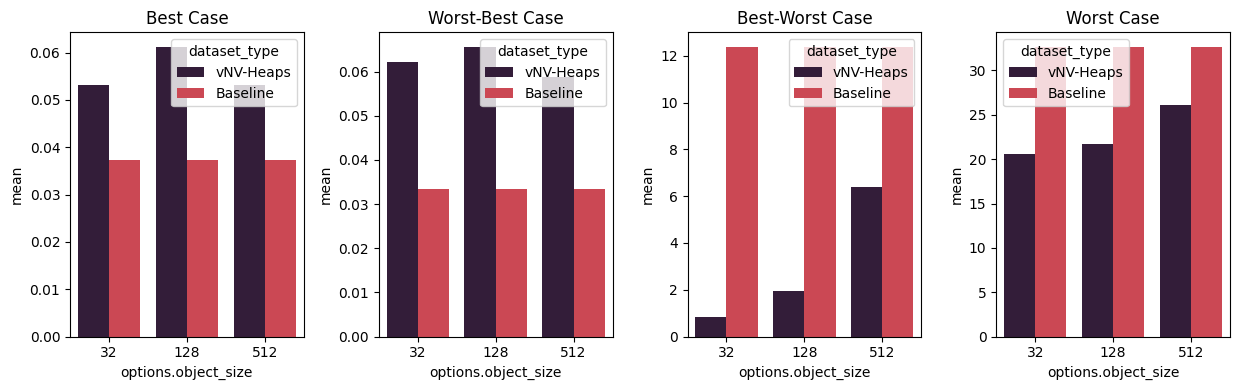

In [5]:
from util.plot import set_theme
from util.convert import scale_and_filter_data
import seaborn as sns
import matplotlib.pyplot as plt

#set_theme(colors=2)
sns.set_palette(palette=[sns.color_palette("rocket")[0], sns.color_palette("rocket")[3]])

titles = dataset["benchmark_title"].unique()

fig, axes = plt.subplots(1, len(titles))
fig.set_figheight(4)
fig.set_figwidth(12.5)

axes = axes.flatten()

i = 0
for benchmark_title in titles:
    filtered = dataset[dataset["benchmark_title"] == benchmark_title]
    filtered = scale_and_filter_data(filtered, unit, plotted_object_sizes)
    g = sns.barplot(
        data=filtered,
        x="options.object_size", y="mean", hue="dataset_type",
        #errorbar="sd", alpha=.8, height=6,
        ax=axes[i]
    )
    g.set_title(benchmark_title)
    i += 1


plt.close(2)
plt.close(3)
plt.tight_layout()

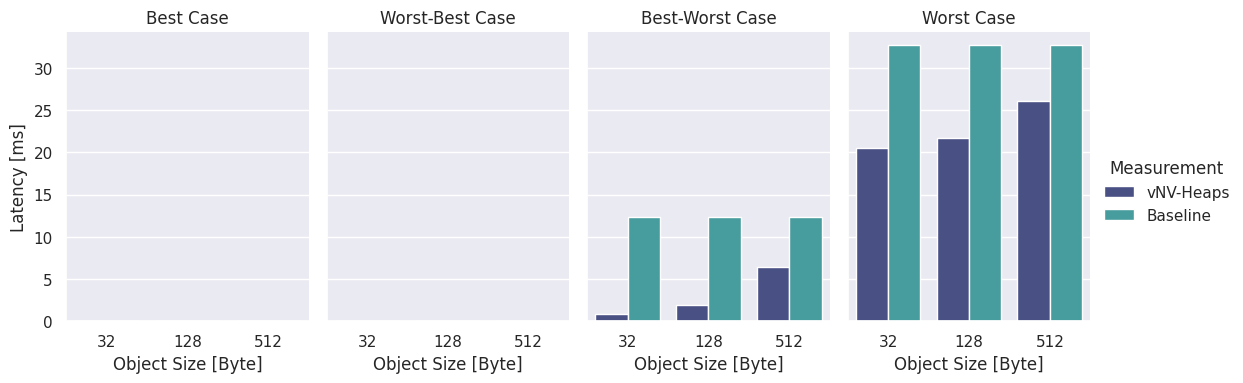

In [6]:
from util.plot import set_theme
from util.convert import scale_data, scale_and_filter_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

set_theme(colors=2)

unit = "ms"
filtered = scale_and_filter_data(dataset, unit, plotted_object_sizes)

g = sns.catplot(
    data=filtered,
    kind="bar",
    x="options.object_size", y="mean", hue="dataset_type", col="benchmark_title",
    
    errorbar="sd", alpha=1, aspect=.7, height=4, 
)
g.set_titles("{col_name}")
g.set(xlabel='Object Size [Byte]', ylabel='Latency [ms]')

g.legend.set_title("Measurement")